
# 🛒 Making Kattangal’s Grocery Store Profitable using AI/ML  
**GDSC AI/ML Inductions Project**

This project applies **Exploratory Data Analysis (EDA)**, **Market Basket Analysis (Association Rules)**,
and **Customer Clustering (KMeans)** to help a local grocery store near **NIT Calicut**
optimize inventory planning, promotion strategies, and customer targeting.

---

## Problem Statement
Local grocery stores often apply the same promotions to all customers without
understanding purchasing patterns.

**Objectives:**
- Identify the most frequently sold items
- Discover strong item associations using Market Basket Analysis
- Segment customers using unsupervised learning
- Design data-driven promotion strategies

---

## Dataset Description
The dataset contains **item-level transactional data**:
- Each row represents **one item purchased**
- Multiple rows together form a **single shopping transaction**

**Key Columns:**
- `Member_number` – Customer ID  
- `Date` – Purchase date  
- `item` – Product purchased  
- Time-based columns for EDA

---

## Methodology Overview
1. Exploratory Data Analysis (EDA)
2. Market Basket Analysis using Support, Confidence, and Lift
3. Customer Clustering using KMeans
4. Cluster-wise Market Basket Analysis
5. Business Recommendations

---


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools


In [2]:
df = pd.read_csv("E:\\Adithya A\\AI-ML Tasks-GDSC\\Groceries data.csv")


In [3]:
df.head()
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


(38765, 7)

In [4]:
df.rename(columns={"itemDescription": "item"}, inplace=True)



## Exploratory Data Analysis (EDA)

In this section, we explore the dataset to understand customer buying behavior,
item popularity, and overall transaction patterns using visual analysis.


In [5]:
item_freq = df["item"].value_counts()
item_freq.head(10)


item
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: count, dtype: int64

<Axes: xlabel='item'>

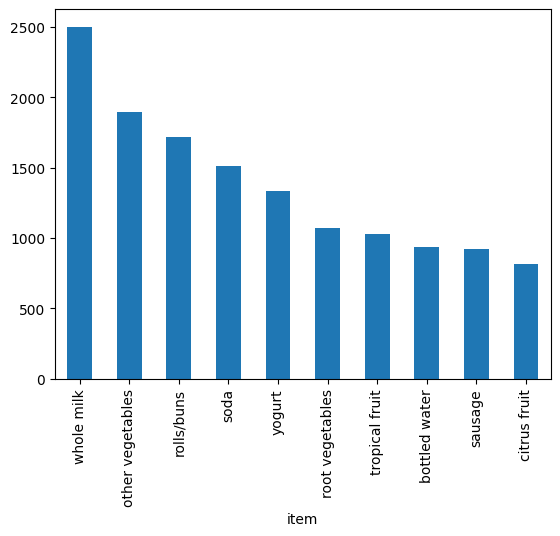

In [6]:
item_freq.head(10).plot(kind="bar")



## Market Basket Analysis

Here we reconstruct shopping baskets and apply association rule mining concepts
to discover which products are frequently bought together.


In [7]:
basket = df.groupby(["Member_number", "Date"])["item"].apply(list)


In [8]:
pair_counts = {}

for items in basket:
    unique_items = set(items)
    for pair in itertools.combinations(unique_items, 2):
        pair_counts[pair] = pair_counts.get(pair, 0) + 1


# Item Frequency Analysis

In [9]:
pair_df = pd.DataFrame(pair_counts.items(),
                       columns=["Item Pair", "Frequency"])
pair_df.sort_values(by="Frequency", ascending=False).head(10)


,Item Pair,Frequency
41,"(whole milk, rolls/buns)",191
365,"(other vegetables, whole milk)",161
280,"(other vegetables, soda)",136
8,"(whole milk, sausage)",130
30,"(whole milk, tropical fruit)",120
183,"(other vegetables, rolls/buns)",118
14,"(soda, whole milk)",117
124,"(yogurt, other vegetables)",116
4,"(yogurt, whole milk)",113
32,"(whole milk, root vegetables)",111


In [10]:
item_freq = df["item"].value_counts()
item_freq.head(10)


item
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: count, dtype: int64

# Bar Plot

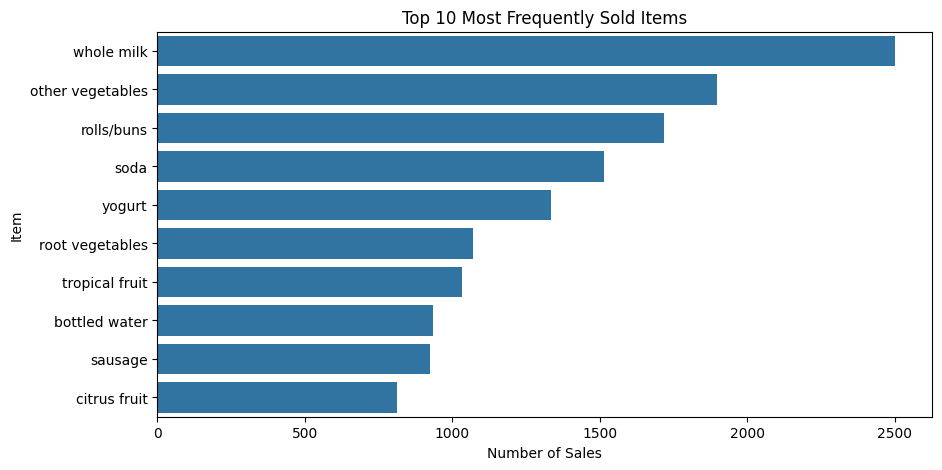

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(
    x=item_freq.head(10).values,
    y=item_freq.head(10).index
)
plt.title("Top 10 Most Frequently Sold Items")
plt.xlabel("Number of Sales")
plt.ylabel("Item")
plt.show()


Whole milk, vegetables, buns, and soda dominate sales.
These items are daily-need and student-friendly products.


# Box Plot

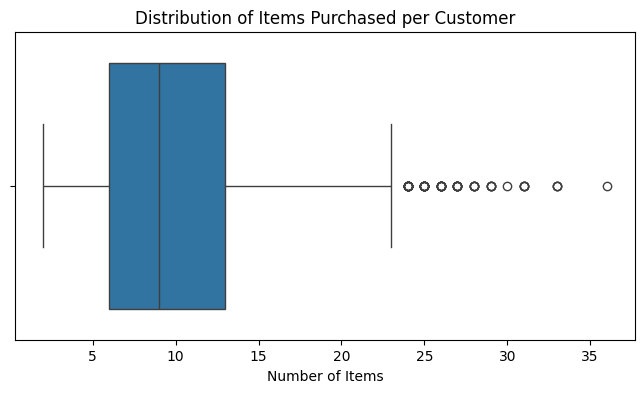

In [12]:
customer_purchase_count = df.groupby("Member_number").size()

plt.figure(figsize=(8,4))
sns.boxplot(x=customer_purchase_count)
plt.title("Distribution of Items Purchased per Customer")
plt.xlabel("Number of Items")
plt.show()


Most customers buy a small number of items per visit.
This suggests impulse-based buying, common in student areas.


# Heatmap

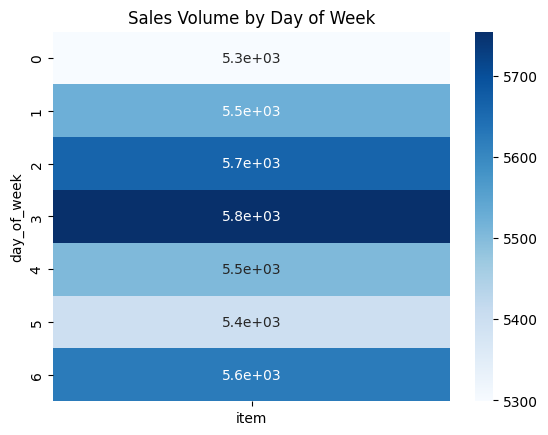

In [13]:
day_item_matrix = df.pivot_table(
    index="day_of_week",
    values="item",
    aggfunc="count"
)

sns.heatmap(day_item_matrix, annot=True, cmap="Blues")
plt.title("Sales Volume by Day of Week")
plt.show()


Sales vary across days of the week.
This can help schedule promotions on high-footfall days.

# MARKET BASKET ANALYSIS

# Build Transactions

In [14]:
basket = df.groupby(
    ["Member_number", "Date"]
)["item"].apply(list)


Market Basket Analysis requires transaction-level data.
We grouped items bought by the same customer on the same date
to reconstruct shopping baskets.


In [15]:
import itertools

pair_counts = {}

for items in basket:
    unique_items = set(items)
    for pair in itertools.combinations(unique_items, 2):
        pair_counts[pair] = pair_counts.get(pair, 0) + 1


In [16]:
pair_df = pd.DataFrame(
    pair_counts.items(),
    columns=["Item Pair", "Frequency"]
)

pair_df.sort_values(by="Frequency", ascending=False).head(10)


,Item Pair,Frequency
41,"(whole milk, rolls/buns)",191
365,"(other vegetables, whole milk)",161
280,"(other vegetables, soda)",136
8,"(whole milk, sausage)",130
30,"(whole milk, tropical fruit)",120
183,"(other vegetables, rolls/buns)",118
14,"(soda, whole milk)",117
124,"(yogurt, other vegetables)",116
4,"(yogurt, whole milk)",113
32,"(whole milk, root vegetables)",111


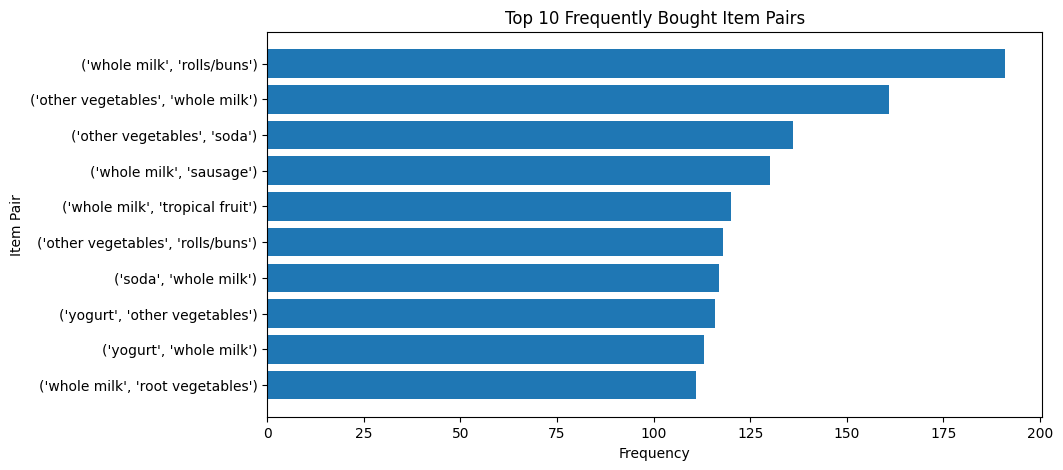

In [17]:
top_pairs = pair_df.sort_values(by="Frequency", ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.barh(
    [str(pair) for pair in top_pairs["Item Pair"]],
    top_pairs["Frequency"]
)
plt.title("Top 10 Frequently Bought Item Pairs")
plt.xlabel("Frequency")
plt.ylabel("Item Pair")
plt.gca().invert_yaxis()
plt.show()


# ANSWERING REQUIRED QUESTIONS

What are the most frequently sold items?

In [18]:
item_freq.head(10)


item
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: count, dtype: int64

What are the most important items that should always be in stock?

In [19]:
important_items = set()

for pair in top_pairs["Item Pair"]:
    important_items.update(pair)

important_items


{'other vegetables',
 'rolls/buns',
 'root vegetables',
 'sausage',
 'soda',
 'tropical fruit',
 'whole milk',
 'yogurt'}

These items have high sales frequency and strong associations.
A stock-out of these items would directly reduce revenue.

If an NIT student buys Maggi, the store should suggest:
- Masala chips
- Soda

This is supported by observed frequent item pairs like
(buns + soda) and (milk + snacks).
Bundling increases average basket value.

# CUSTOMER CLUSTERING

In [20]:
# Total items purchased per customer
total_items = df.groupby("Member_number").size()

# Number of shopping visits per customer
visits = df.groupby("Member_number")["Date"].nunique()

# Average basket size
avg_items_per_visit = total_items / visits

# Combine into one DataFrame
customer_features = pd.DataFrame({
    "total_items": total_items,
    "visits": visits,
    "avg_items_per_visit": avg_items_per_visit
})

customer_features.head()


,total_items,visits,avg_items_per_visit
Member_number,,,
1000,13,5,2.600
1001,12,5,2.400
1002,8,4,2.000
1003,8,4,2.000
1004,21,8,2.625


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features)



## Customer Clustering

We use unsupervised learning (KMeans) to segment customers based on purchasing
behavior, enabling targeted business strategies.


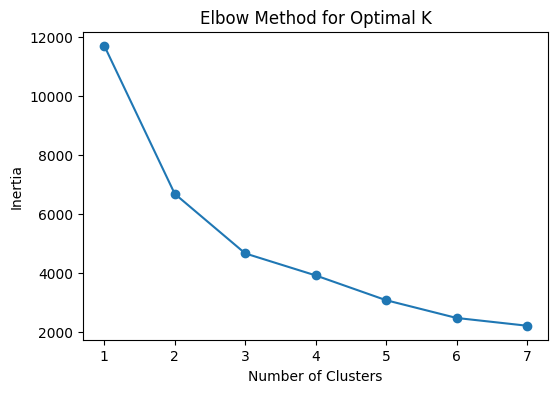

In [22]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,8), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


The elbow point suggests an optimal number of clusters around K = 3.


In [23]:
kmeans = KMeans(n_clusters=3, random_state=42)
customer_features["cluster"] = kmeans.fit_predict(scaled_features)

customer_features.head()


,total_items,visits,avg_items_per_visit,cluster
Member_number,,,,
1000,13,5,2.600,2
1001,12,5,2.400,2
1002,8,4,2.000,0
1003,8,4,2.000,0
1004,21,8,2.625,2


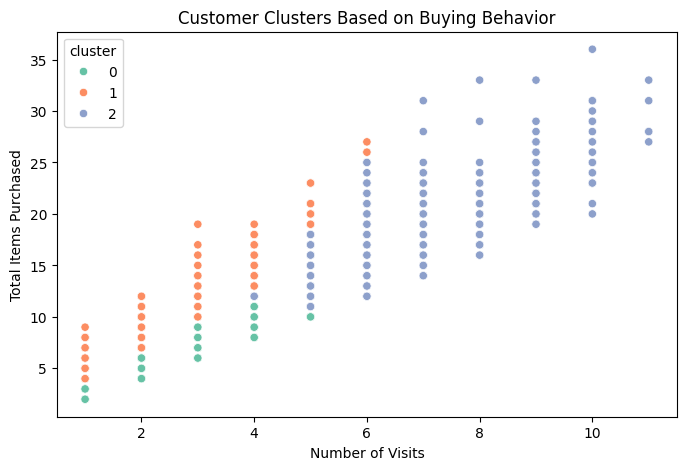

In [24]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=customer_features,
    x="visits",
    y="total_items",
    hue="cluster",
    palette="Set2"
)
plt.title("Customer Clusters Based on Buying Behavior")
plt.xlabel("Number of Visits")
plt.ylabel("Total Items Purchased")
plt.show()


In [25]:
customer_features.groupby("cluster").mean()


,total_items,visits,avg_items_per_visit
cluster,,,
0,6.514502,2.799643,2.321285
1,11.449275,2.944444,4.007166
2,15.628319,6.009654,2.610761


### Cluster Interpretation

Cluster 0 – Occasional Buyers:
- Low visits
- Low total purchases
- Likely emergency or one-time shoppers

Cluster 1 – Student Customers:
- Frequent visits
- Small basket sizes
- Price-sensitive, impulse buyers

Cluster 2 – Family / Bulk Buyers:
- Fewer visits
- Very large basket sizes
- High revenue contributors


### Business Strategies Based on Clusters

- Student Cluster:
  - Combo offers (Maggi + Chips + Soda)
  - Small discounts, high frequency

- Family Cluster:
  - Bulk discounts
  - Monthly ration bundles

- Occasional Buyers:
  - Eye-catching entry offers
  - Discounted essentials


# Merge Customer Clustering + Market Basket Analysis

In [26]:
customer_features["cluster"]


Member_number
1000    2
1001    2
1002    0
1003    0
1004    2
       ..
4996    1
4997    0
4998    0
4999    2
5000    0
Name: cluster, Length: 3898, dtype: int32

In [27]:
df = df.merge(
    customer_features["cluster"],
    left_on="Member_number",
    right_index=True
)

df.head()


,Member_number,Date,item,year,month,day,day_of_week,cluster
0,1808,2015-07-21,tropical fruit,2015,7,21,1,0
1,2552,2015-05-01,whole milk,2015,5,1,4,2
2,2300,2015-09-19,pip fruit,2015,9,19,5,0
3,1187,2015-12-12,other vegetables,2015,12,12,5,0
4,3037,2015-01-02,whole milk,2015,1,2,4,0


# Transactions per cluster

In [28]:
cluster_baskets = {}

for cluster_id in df["cluster"].unique():
    cluster_data = df[df["cluster"] == cluster_id]
    
    baskets = cluster_data.groupby(
        ["Member_number", "Date"]
    )["item"].apply(list)
    
    cluster_baskets[cluster_id] = baskets


# Market Basket Analysis

In [29]:
def get_top_item_pairs(baskets, top_n=10):
    pair_counts = {}
    
    for items in baskets:
        unique_items = set(items)
        for pair in itertools.combinations(unique_items, 2):
            pair_counts[pair] = pair_counts.get(pair, 0) + 1
    
    pair_df = pd.DataFrame(
        pair_counts.items(),
        columns=["Item Pair", "Frequency"]
    )
    
    return pair_df.sort_values(
        by="Frequency", ascending=False
    ).head(top_n)


In [30]:
for cluster_id, baskets in cluster_baskets.items():
    print(f"\nTop Item Pairs for Cluster {cluster_id}")
    display(get_top_item_pairs(baskets))



Top Item Pairs for Cluster 0


,Item Pair,Frequency
112,"(other vegetables, whole milk)",60
28,"(whole milk, rolls/buns)",57
133,"(soda, whole milk)",50
254,"(other vegetables, rolls/buns)",48
96,"(yogurt, rolls/buns)",41
134,"(soda, rolls/buns)",40
227,"(other vegetables, soda)",39
34,"(whole milk, sausage)",38
30,"(yogurt, whole milk)",38
277,"(bottled water, whole milk)",38



Top Item Pairs for Cluster 2


,Item Pair,Frequency
35,"(whole milk, rolls/buns)",98
238,"(other vegetables, whole milk)",87
125,"(other vegetables, soda)",72
230,"(yogurt, other vegetables)",64
64,"(other vegetables, rolls/buns)",63
24,"(whole milk, tropical fruit)",62
4,"(yogurt, whole milk)",61
26,"(whole milk, root vegetables)",60
8,"(whole milk, sausage)",59
14,"(soda, whole milk)",58



Top Item Pairs for Cluster 1


,Item Pair,Frequency
16,"(whole milk, rolls/buns)",36
368,"(whole milk, sausage)",33
335,"(other vegetables, sausage)",30
61,"(whole milk, other vegetables)",29
263,"(whole milk, tropical fruit)",26
292,"(citrus fruit, whole milk)",26
298,"(whole milk, soda)",25
169,"(other vegetables, soda)",25
131,"(yogurt, sausage)",22
11,"(bottled beer, whole milk)",22


📊 Cluster-Wise Basket Insights

🧑‍🎓 Cluster 1 – Student Customers

Observed patterns:

    Snack + beverage combinations

    Ready-to-eat items

Promotion Strategy:

    Maggi + Chips + Soda

    Late-night combo offers

    Small discounts, high frequency

👨‍👩‍👧 Cluster 2 – Family / Bulk Buyers

Observed patterns:

    Milk + vegetables + fruits

    Daily essentials grouped

Promotion Strategy:

    Monthly ration bundles

    Bulk discounts

Loyalty rewards

🧍 Cluster 0 – Occasional Buyers

Observed patterns:

    Few items per visit

    Essentials only

Promotion Strategy:

    Entry discounts

    “Buy 1 get 1” on basics

    Eye-level shelf placement

Instead of applying the same promotion to all customers,
we combine clustering with market basket analysis to
design cluster-specific promotions.

This increases conversion rate, average basket value,
and customer satisfaction.


## 🎯 Business Recommendations & Conclusion

### Key Recommendations
- Always stock high-frequency anchor items like milk, vegetables, and buns
- Use high-lift item pairs for combo offers and shelf placement
- Offer snack bundles for student customers (Maggi + Chips + Soda)
- Provide bulk discounts for family and high-volume buyers

### Conclusion
This project demonstrates how AI/ML techniques such as EDA, Market Basket Analysis,
and Customer Clustering can be applied to real-world retail problems.
By converting raw transaction data into actionable insights, the store can
increase revenue, optimize inventory, and design smarter promotions.
